In [1]:
\import pandas as pd

C:\Users\ninad\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
df=pd.read_csv('GOOG.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [11]:
df1=df[['Open']].copy()

In [12]:
df1.head()

,Open
0,2.490664
1,2.515820
2,2.758411
3,2.770615
4,2.614201


In [13]:
df1.shape

(4858, 1)

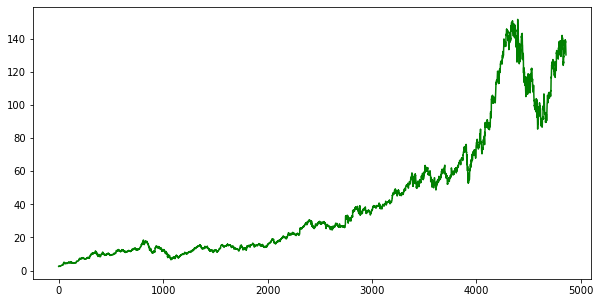

In [15]:
import matplotlib.pylab as plt
plt.figure(figsize=(10,5))
plt.plot(df1,color='green')
plt.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0,1))
scaled=mm.fit_transform(df1)

In [32]:
df1=pd.DataFrame(scaled)

In [34]:
x_train=df1[59:4857]
y_train=df1[60:4858]

In [35]:
x_train.shape

(4798, 1)

In [36]:
import numpy as np

In [38]:
x_train=np.reshape(x_train,(4798,1,1))
x_train.shape

(4798, 1, 1)

In [39]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [40]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))

regressor.add(Dropout(0.2))

In [41]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [42]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [43]:
regressor.add(Dense(units=1))


In [44]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [45]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
150/150 [==============================] - 5s 3ms/step - loss: 0.0362
Epoch 2/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 3/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 4/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 5/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 6/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 7/100
150/150 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 8/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 9/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 10/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 11/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 12/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 13/100


In [66]:
test=pd.read_csv('Goog_test.csv')
df2=test.iloc[:,1:2]
print(len(df2))

40


In [67]:
input_val=df2
input_val=mm.fit_transform(input_val)

In [68]:
input_val=np.reshape(input_val,(40,1,1))

In [69]:
prediction=regressor.predict(input_val)
prediction=mm.inverse_transform(prediction)

2/2 [==============================] - 0s 3ms/step


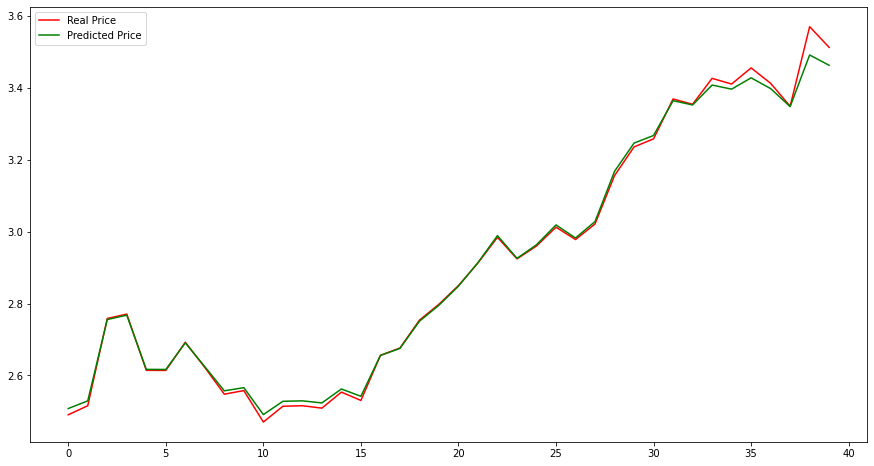

In [70]:
plt.rcParams['figure.figsize']=(15,8)
plt.plot(df2,color='red',label='Real Price')
plt.plot(prediction,color='green',label='Predicted Price')
plt.legend()
plt.show()